In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab08.ipynb")

<img src="data8logo.png" alt="Data 8 Logo" style="width: 15%; float: right; padding: 1%; margin-right: 2%;"/>

# Lab 8: Normal Distribution and Variability of Sample Means

Welcome to Lab 8! This week's lab will look into the normal distribution and variability of sample means through data on births and San Francisco salaries.

#### **Helpful Resource:**
- [Python Reference](http://data8.org/fa24/reference/)

**Recommended Readings:**
- [Variability of the Sample Mean](https://inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html)
- [Normal Distribution](https://www.inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html)

**Getting help on lab**: Whenever you feel stuck or need some further clarification, find a GSI or tutor, and they'll be happy to help!

As a reminder, here are the policies for getting full credit:

1. For students enrolled in in-person <span style="color: #BC412B">**Regular Labs**</span>, you will receive 80% lab credit by **attending** lab discussion and 20% lab credit for passing all test cases and submitting it to Gradescope by **5pm on the Friday the same week it was released**.

2. For students enrolled in <span style="color: #04888B">**Self Service**</span>, you will receive full lab credit by **completing** the notebook, passing all test cases, and **submitting** it to Gradescope by **5pm on the Friday the same week it was released**.

**Submission**: Once you’re finished, run all cells besides the last one, select File > Save Notebook, and then execute the final cell. The result will contain a zip file that you can use to submit on Gradescope.

Let's begin by setting up the tests and imports by running the cell below.

In [2]:
# Run this cell, but please don't change it.
 
# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore')

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# 1. Normal Distributions

When we visualize the distribution of a sample, we are often interested in the mean and the standard deviation of the sample (for the rest of this lab, we will abbreviate “standard deviation” as “SD”). These two sample statistics can give us a bird’s eye view of the distribution -- by letting us know where the distribution sits on the number line and how spread out it is, respectively. 

We want to check if the data is linearly related, so we should look at the data.

First, let's load in the `births` table from lecture, which is a large random sample of US births and includes information about mother-child pairs.

In [3]:
births = Table.read_table('baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


<hr style="border: 1px solid #fdb515;" />

**Question 1.1.** **Now, write a line of code to plot the distribution of mother’s ages from the `births` table.** Don’t change the last line, which will plot the mean of the sample on the distribution itself.


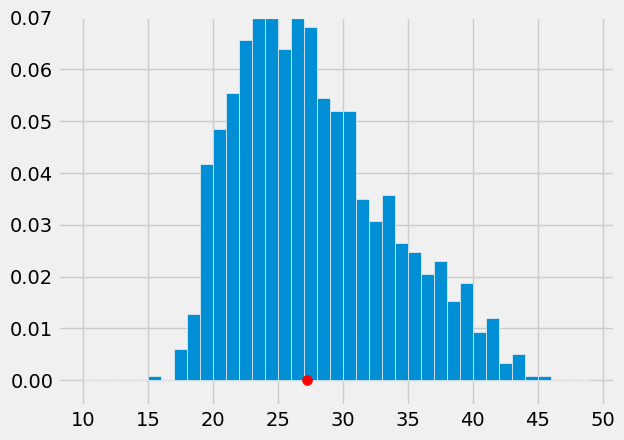

In [7]:
plots.hist(births.column('Maternal Age'), bins = np.arange(10, 50, 1), density = True)

# Do not change anything below this line
plots.scatter(np.mean(births.column("Maternal Age")), 0, color='red', zorder=2, s=50);
plots.ylim(-0.005, 0.07);

From the plot above, we can see that the mean is the center of gravity or balance point of the distribution. If you cut the distribution out of cardboard, and then placed your finger at the mean, the distribution would perfectly balance on your finger. Since the distribution above is right skewed (which means it has a long right tail), we know that the mean of the distribution is larger than the median, which is the “halfway” point of the data. Conversely, if the distribution had been left skewed, we know the mean would be smaller than the median.

<hr style="border: 1px solid #fdb515;" />

**Question 1.2.** Run the following cell to compare the mean (red) and median (blue) of the distribution of mothers ages.

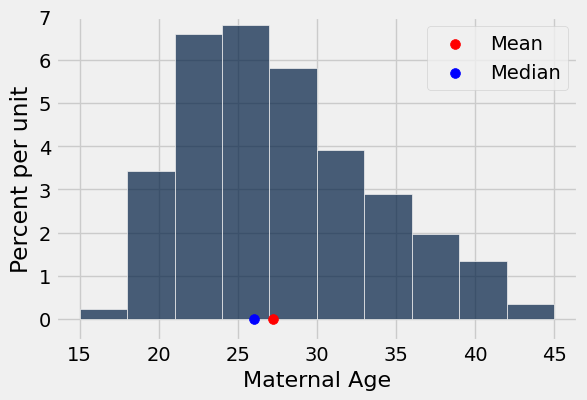

In [8]:
births.hist("Maternal Age")
plots.scatter(np.mean(births.column("Maternal Age")), 0, color='red', zorder=2, s=50, label="Mean")
plots.scatter(np.median(births.column("Maternal Age")), 0, color='blue', zorder=2, s=50, label="Median")
plots.legend()
plots.ylim(-0.005, 0.07);

We are also interested in the standard deviation of mother’s ages. The SD gives us a sense of how variable mothers' ages are around the average mothers' age. If the SD is large, then the mothers' ages should spread over a large range from the mean. If the SD is small, then the mothers' ages should be tightly clustered around the average mother age. 

**The SD of an array is defined as the "root mean square of the deviations" where the deviations are the difference between the original elements and their average.**

You can read more about Variability and SD in [Chapter 14.2](https://inferentialthinking.com/chapters/14/2/Variability.html). This chapter also goes a bit more into detail about how "root mean square of the deviations" is calculated. Fun fact! $\sigma$ (Greek letter sigma) is used to represent the SD and $\mu$ (Greek letter mu) is used for the mean. 

<hr style="border: 1px solid #fdb515;" />

**Question 1.3.** Assign `age_mean` to the mean of the maternal ages and `age_sd` to the SD of the maternal ages. Then run the cell below to see the width of one SD (blue) from the sample mean (red) plotted on the histogram of maternal ages.

*Hint*: `np.std` might be useful here.


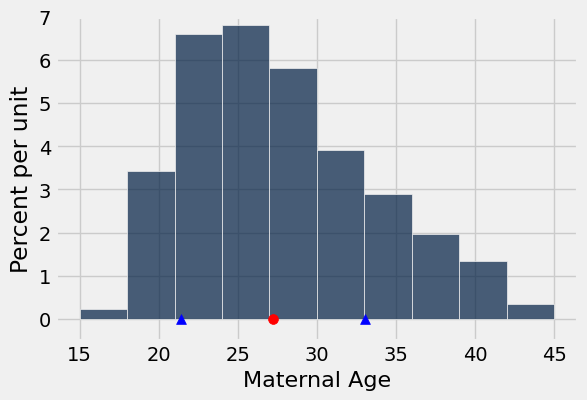

In [9]:
age_mean = np.mean(births.column('Maternal Age'))
age_sd = np.std(births.column('Maternal Age'))
births.hist("Maternal Age")

plots.scatter(age_mean, 0, color='red', zorder=2, s=50);
plots.scatter(age_mean+age_sd, 0, marker='^', color='blue', zorder=2, s=50);
plots.scatter(age_mean-age_sd, 0, marker='^', color='blue', zorder=2, s=50);
plots.ylim(-0.005, 0.07);

In [10]:
grader.check("q1_3")

q1_3 results: All test cases passed!

In this histogram, the standard deviation is not easy to identify just by looking at the graph.

However, the distributions of some variables allow us to easily spot the standard deviation on the plot. For example, if a sample follows a **[normal distribution](https://inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html)**, the standard deviation is easily spotted at the point of inflection (the point where the curve begins to change the direction of its curvature) of the distribution. 

<hr style="border: 1px solid #fdb515;" />

**Question 1.4.** Fill in the following code to examine the distribution of maternal heights, which is roughly normally distributed. We’ll plot the standard deviation on the histogram, as before - notice where one standard deviation (blue) away from the mean (red) falls on the plot.


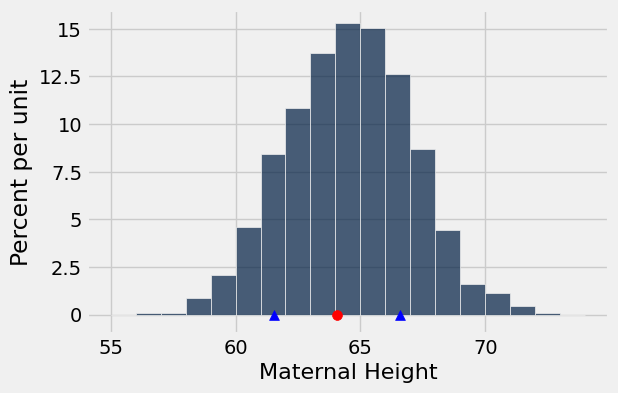

In [11]:
height_mean = np.mean(births.column('Maternal Height'))
height_sd = np.std(births.column('Maternal Height'))
births.hist("Maternal Height", bins=np.arange(55,75,1))

plots.scatter((height_mean), 0, color='red', zorder=2, s=50);
plots.scatter(height_mean+height_sd, 0, marker='^', color='blue', zorder=2, s=50);
plots.scatter(height_mean-height_sd, 0, marker='^', color='blue', zorder=2, s=50);
plots.ylim(-0.01, 0.16);

In [12]:
grader.check("q1_4")

q1_4 results: All test cases passed!

We don’t always know how a variable will be distributed, and making assumptions about whether or not a variable will follow a normal distribution is dangerous. However, the **Central Limit Theorem** defines one distribution that always follows a normal distribution. **The distribution of the *sums* and *means* of all large random samples drawn with replacement (and thus are independent from one another) from a single distribution (regardless of the distribution’s original shape) will be normally distributed.** Remember that the Central Limit Theorem refers to the distribution of a *statistic* calculated from a distribution, not the distribution of the original sample or population. If this is confusing, ask a staff member!

The next section will explore distributions of sample means, and you will see how the standard deviation of these distributions depends on sample sizes.

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# 2. Variability of the Sample Mean

By the [Central Limit Theorem](https://www.inferentialthinking.com/chapters/14/4/Central_Limit_Theorem.html), the probability distribution of the mean or sum of a large random sample is roughly normal. The bell curve is centered at the population mean. Some of the sample means are higher and some are lower, but the deviations from the population mean are roughly symmetric on either side, as we have seen repeatedly.

In our simulations, we also noticed that the means of larger samples tend to be more tightly clustered around the mean of the distribution we sample from, compared if we had smaller samples. Note that in this lab, the data we have access to and sample from is the population (which we rarely have access to), while when we bootstrap, the distribution we sample from is our original sample.

In this section, we will quantify the [variability of the sample mean](https://www.inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html) and develop a relation between the variability and the sample size.

Let's take a look at the salaries of employees of the City of San Francisco in 2023. The median salary reported by the city government was about $169,361. **Note that in this lab, this dataset is the population.**

This data was collected by [Transparent California](https://transparentcalifornia.com/salaries/2023/san-francisco/) where the `salary` column is calculated by summing up regular, overtime, and other pay.

_Note: If you get stuck on any part of this lab, please refer to [Chapter 14 of the textbook](https://www.inferentialthinking.com/chapters/14/Why_the_Mean_Matters.html)._


In [13]:
salaries = Table.read_table('sf_salaries_2023.csv')
salaries.show(5)

salary
678381
653854
580333
565644
522043


In [14]:
salary_mean = np.mean(salaries.column('salary'))
print('Mean salary of San Francisco city employees in 2023: ', salary_mean.round(2))

Mean salary of San Francisco city employees in 2023:  113394.16


In [15]:
max(salaries.column(0))

678381.01000000001

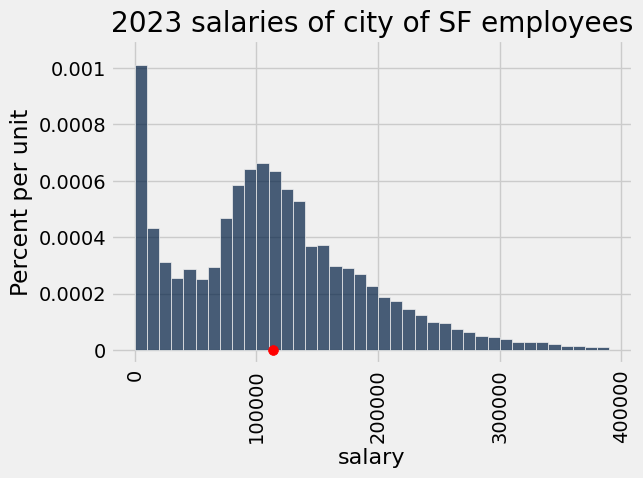

In [16]:
salaries.hist('salary', bins=np.arange(0, 400000, 10000))
plots.scatter(salary_mean, 0, color='red', zorder=2, s=50)
plots.title('2023 salaries of city of SF employees')
plots.ylim(-0.0000005, 0.000011);

Clearly, the population _does not_ follow a normal distribution. Keep that in mind as we progress through these exercises.

Let's take random samples **with replacement** and look at the probability distribution of the sample mean. As usual, we will use simulation to get an empirical approximation to this distribution.


<hr style="border: 1px solid #fdb515;" />

**Question 2.1.** Define a function `one_sample_mean`. Its arguments should be `table` (the name of a table), `label` (the label of the column containing the variable), and `sample_size`(the number of employees in the sample). It should sample with replacement from the table and
return the mean of the `label` column of the sample.

_Note:_ The function should reference the arguments and be able to work with any table.

In [17]:
def one_sample_mean(table, label, sample_size):
    new_sample = table.sample(sample_size, with_replacement = True)
    new_sample_mean = np.mean(new_sample.column(label))
    return new_sample_mean

In [18]:
grader.check("q2_1")

q2_1 results: All test cases passed!

<hr style="border: 1px solid #fdb515;" />

**Question 2.2.** Use `one_sample_mean` to define a function `simulate_sample_mean`. The arguments are the name of the `table`, the `label` of the column containing the variable, the `sample_size`, and the number of simulations (`repetitions`).

The function should sample with replacement from the table and calculate the mean of each sample. It should save the sample means in an array called `means`. The remaining code in the function displays an empirical histogram of the sample means.

_Note:_ We round all values to 2 decimal places in the provided code because we are working with salaries.


In [19]:
"""Empirical distribution of random sample means"""

def simulate_sample_mean(table, label, sample_size, repetitions):
    
    means = make_array()

    for i in np.arange(repetitions):
        new_sample_mean = one_sample_mean(table, label, sample_size)
        means = np.append(means, new_sample_mean)

    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities – don't change this!
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size {sample_size}; {repetitions} Resamples'.format(sample_size=sample_size, repetitions=repetitions))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(table.column(label)).round(2))
    print("Average of sample means: ", np.mean(means).round(2))
    print("Population SD:", np.std(table.column(label)).round(2))
    print("SD of sample means:", np.std(means).round(2))
    return np.std(means)

Verify with a peer or TA that you've implemented the function above correctly. If you haven't implemented it correctly, the rest of the lab won't work properly, so this step is crucial.


In the following cell, we will create a sample of size 100 from `salaries` and graph it using our new `simulate_sample_mean` function.

_Hint: You should see a distribution similar to something we've been talking about. If not, check your function._


Sample size:  100
Population mean: 113394.16
Average of sample means:  113389.27
Population SD: 78501.6
SD of sample means: 7788.02


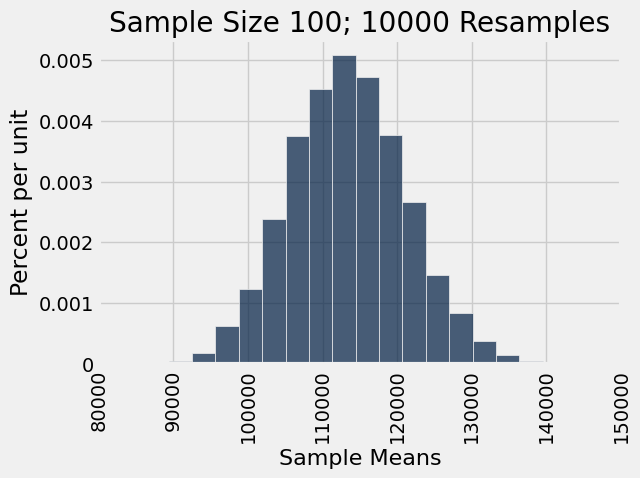

In [20]:
simulate_sample_mean(salaries, 'salary', 100, 10000) 
plots.xlim(80000, 150000);

Notice that our distribution of _sample means_ looks approximately normal! Did it matter if our original distribution was normally distributed?


<hr style="border: 1px solid #fdb515;" />

**Question 2.3.** Simulate two sample means, one for a sample of 400 salaries and one for a sample of 625 salaries. In each case, perform 10,000 repetitions. Don't worry about the `plots.xlim` or `plots.ylim` lines – they just make sure that all of the plots have the same x-axis and y-axis, respectively.


Sample size:  400
Population mean: 113394.16
Average of sample means:  113450.85
Population SD: 78501.6
SD of sample means: 3893.05


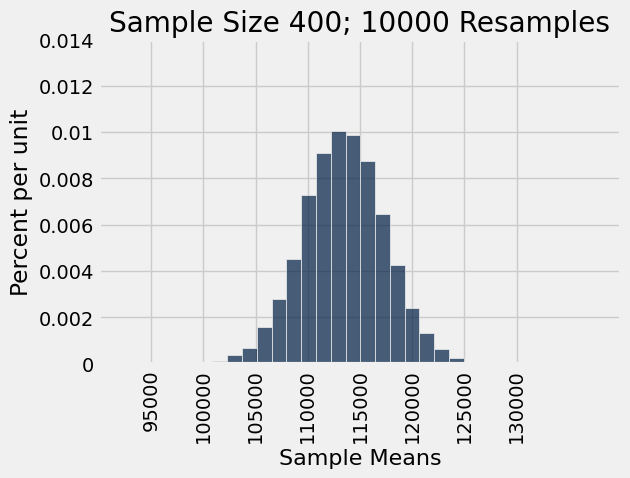



Sample size:  625
Population mean: 113394.16
Average of sample means:  113448.8
Population SD: 78501.6
SD of sample means: 3140.13


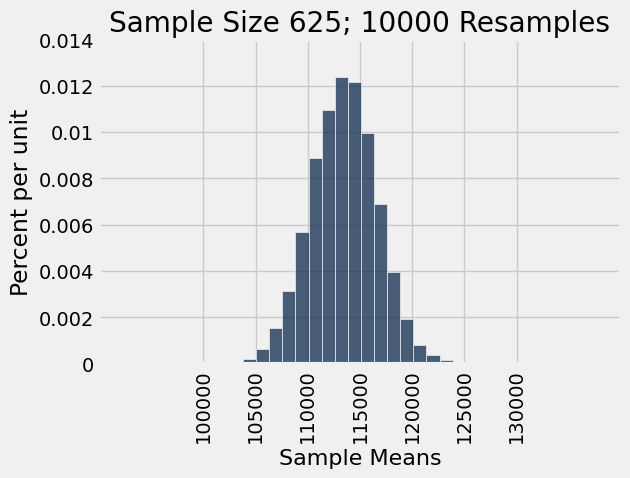

In [21]:
simulate_sample_mean(salaries, 'salary', 400, 10000)
plots.xlim(90000, 140000)
plots.ylim(0, 0.00014)
plots.show();
print('\n')
simulate_sample_mean(salaries, 'salary', 625, 10000)
plots.xlim(90000, 140000)
plots.ylim(0, 0.00014)
plots.show();

<hr style="border: 1px solid #fdb515;" />

**Question 2.4.** Assign `q2_4` to an array of numbers corresponding to true statement(s) about the plots from 2.3.

_Hint_: If a distribution is bell-shaped, what type of curve does it follow?

1. We see the Central Limit Theorem (CLT) in action because the distributions of the sample means are bell-shaped.
2. We see the Law of Averages in action because the distributions of the sample means look like the distribution of the population.
3. One of the conditions for CLT is that we have to draw a small random sample with replacement from the population.
4. One of the conditions for CLT is that we have to draw a large random sample with replacement from the population.
5. One of the conditions for CLT is that the population must be normally distributed.


In [22]:
q2_4 = make_array(1, 4)

In [23]:
grader.check("q2_4")

q2_4 results: All test cases passed!

<hr style="border: 1px solid #fdb515;" />

**Question 2.5.** Assign `q2_5` to an array of numbers corresponding to true statement(s) about the plots from 2.3.

1. Both plots in 2.3 are roughly centered around the population mean.
2. Both plots in 2.3 are roughly centered around the mean of a particular sample.
3. The distribution of sample means for sample size 625 has less variability than the distribution of sample means for sample size 400.
4. The distribution of sample means for sample size 625 has more variability than the distribution of sample means for sample size 400.


In [24]:
q2_5 = make_array(1, 3)

In [25]:
grader.check("q2_5")

q2_5 results: All test cases passed!

Below, we'll look at what happens when we take an **increasing number of resamples of a fixed sample size.** Notice what number in the code changes, and what stays the same. How does the distribution of the resampled means change?


Sample size:  100
Population mean: 113394.16
Average of sample means:  113491.3
Population SD: 78501.6
SD of sample means: 7962.7


(0.0, 6e-05)

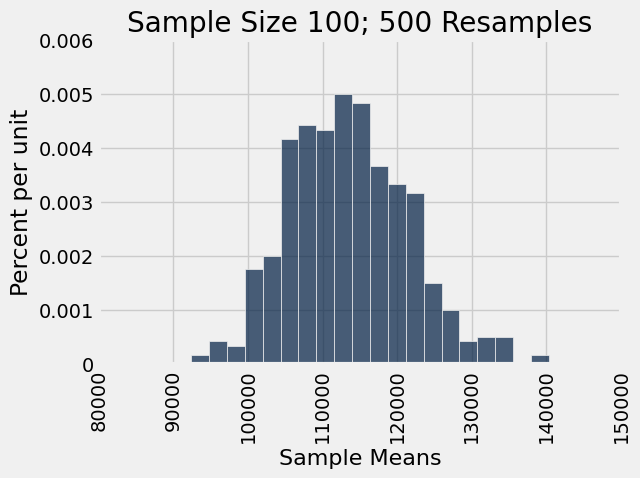

In [26]:
simulate_sample_mean(salaries, 'salary', 100, 500)
plots.xlim(80000, 150000)
plots.ylim(0, 0.00006)

Sample size:  100
Population mean: 113394.16
Average of sample means:  113637.34
Population SD: 78501.6
SD of sample means: 7899.32


(0.0, 6e-05)

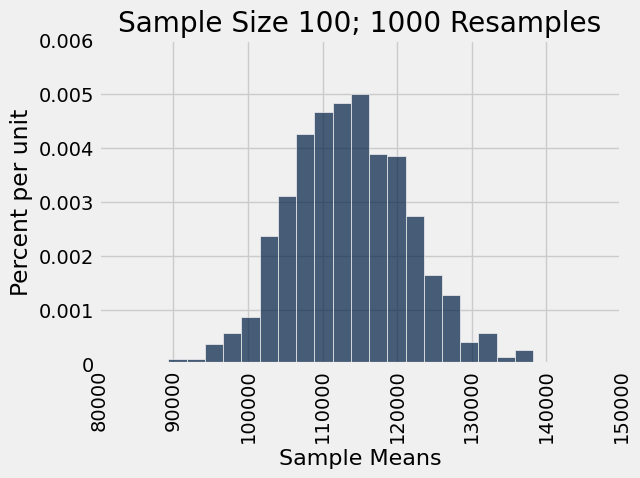

In [27]:
simulate_sample_mean(salaries, 'salary', 100, 1000)
plots.xlim(80000, 150000)
plots.ylim(0, 0.00006)

Sample size:  100
Population mean: 113394.16
Average of sample means:  113375.31
Population SD: 78501.6
SD of sample means: 7962.38


(0.0, 6e-05)

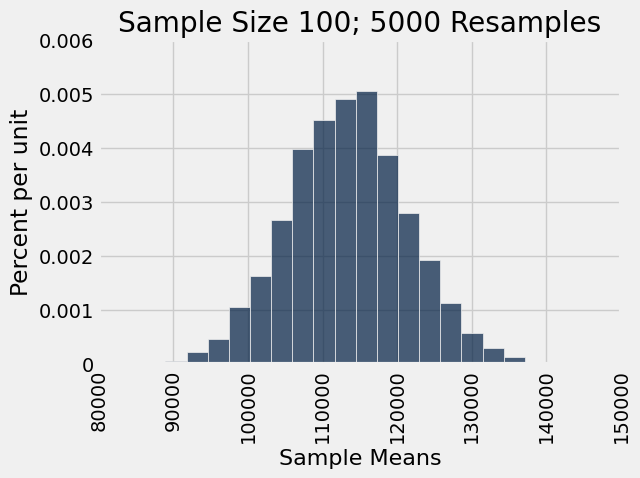

In [28]:
simulate_sample_mean(salaries, 'salary', 100, 5000)
plots.xlim(80000, 150000)
plots.ylim(0, 0.00006)

Sample size:  100
Population mean: 113394.16
Average of sample means:  113478.42
Population SD: 78501.6
SD of sample means: 7832.14


(0.0, 6e-05)

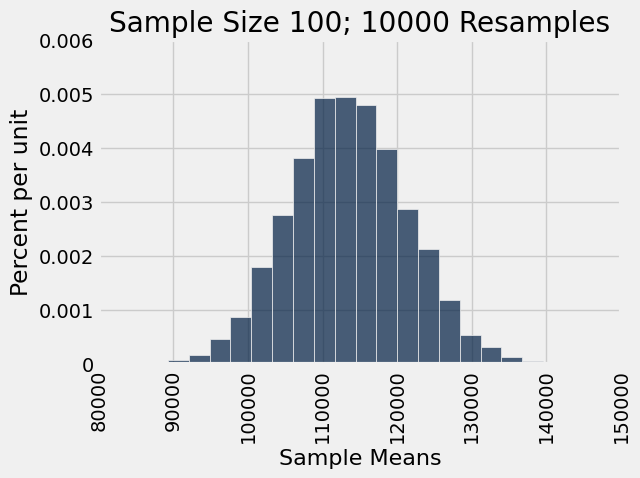

In [29]:
simulate_sample_mean(salaries, 'salary', 100, 10000)
plots.xlim(80000, 150000)
plots.ylim(0, 0.00006)

What did you notice about the distributions of sample means in the four histograms above? Discuss with your peers or ask a staff member.


<hr style="border: 1px solid #fdb515;" />

**Question 2.6.** Assign the variable `SD_of_sample_means` to the integer corresponding to your answer to the following question:

When I increase the number of _resamples_ that I take, for a _fixed_ sample size, the SD of my sample means will...

1. Increase
2. Decrease
3. Stay about the same
4. Vary widely


In [30]:
SD_of_sample_means = 3

In [31]:
grader.check("q2_6")

q2_6 results: All test cases passed!

<hr style="border: 1px solid #fdb515;" />

**Question 2.7.** Let's think about how the relationships between population SD, sample SD, and SD of sample means change with varying sample size. Which of the following is true? Assign the variable `pop_vs_sample` to an array of integer(s) that correspond to true statement(s).

_Hint 1:_ The sample SD is different from the SD of sample means.

_Hint 2:_ [Chapter 14.5](https://inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html) might be helpful for answering this question.

1. Sample SD gets smaller with increasing sample size.
2. Sample SD gets larger with increasing sample size.
3. Sample SD becomes more consistent with population SD with increasing sample size.
4. SD of sample means gets smaller with increasing sample size.
5. SD of sample means gets larger with increasing sample size.
6. SD of sample means stays the same with increasing sample size.


In [32]:
pop_vs_sample = make_array(3, 4)

In [33]:
grader.check("q2_7")

q2_7 results: All test cases passed!

<hr style="border: 1px solid #fdb515;" />

**Question 2.8.** Is there a relationship between the sample size and the standard deviation of the sample means? Assign `q2_8` to the number corresponding to the statement that answers this question.

_Hint:_ [Chapter 14.5](https://inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html) of the textbook may be helpful.

1. The SD of the sample means is inversely proportional to the square root of sample size.
2. The SD of the sample means is directly proportional to the square root of sample size.


In [34]:
q2_8 = 1


In [35]:
grader.check("q2_8")

q2_8 results: All test cases passed!

**Throughout this lab, we have been taking many random samples from a population** (in contrast to re-sampling from a sample). However, all of these principles hold for bootstrapped resamples from a single sample. The bootstrap works because it’s like drawing from the original population assuming the sample is representative. If your original sample is relatively large, all of your re-samples will also be relatively large, and so the SD of resampled means will be relatively small.

It is also important to keep in mind that when doing the bootstrap, our histogram of resample means will be centered around the **original sample mean**, rather than the population mean (as we don’t have access to the population mean usually)!

**In order to change the variability of your sample mean, you’d have to change the size of the original sample from which you are taking bootstrapped resamples.**

---

## Done!

<img src="kulfi.JPEG" alt="Sleepy cat chilling on someone's leg" width="300"/>

<img src="momo.jpg" alt="Black cat that is dripped out with jewelry" width="300"/>

**Kulfi** and **Momo** want to remind you that you're over halfway to the end of the semester! You can do this!


---

You're done with lab!

**Important submission information:**
- **Run all the tests** and verify that they all pass
- **Save** from the **File** menu
- **Run the final cell to generate the zip file**
- **Click the link to download the zip file**
- Then, go to [Gradescope](https://www.gradescope.com/courses/835871) and submit the zip file to the corresponding assignment. The name of this assignment is "Lab XX Autograder", where XX is the lab number -- 01, 02, 03, etc.

- If you finish early in Regular Lab, **ask one of the staff members to check you off**.

**It is your responsibility to make sure your work is saved before running the last cell.**


## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [36]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q1_3 results: All test cases passed!

    q1_4 results: All test cases passed!

    q2_1 results: All test cases passed!

    q2_4 results: All test cases passed!

    q2_5 results: All test cases passed!

    q2_6 results: All test cases passed!

    q2_7 results: All test cases passed!

    q2_8 results: All test cases passed!
